























































































+# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Saransh Sharma`

Roll Number: `20CS30065`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn as nn
import random
import numpy as np

from torchvision import datasets, transforms 
from torch.utils.data import random_split, DataLoader

## Add any other imports here
import matplotlib.pyplot as plt

In [2]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition 
input_size = 784 # 28x28
hidden_size_1 = 64
hidden_size_2 = 128
output_size = 10


# Fill in appropriately while maintaining the name of the variable
modelA = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.ReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, output_size)   
)

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton
input_size = 784 # 28x28
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 256
output_size = 10


# Use the same variable name
modelB = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.ReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.ReLU(),
    nn.Linear(hidden_size_3, output_size)  
)

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definiton
input_size = 784 # 28x28
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 256
hidden_size_4 = 512
output_size = 10



# Use the same variable name
modelC = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.ReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.ReLU(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.ReLU(),
    nn.Linear(hidden_size_3, hidden_size_4),
    nn.ReLU(),
    nn.Linear(hidden_size_4, output_size)
    
)

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [7]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
def set_optimizer(model, lr=0.01):
    return torch.optim.Adam(model.parameters(), lr=lr)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all themodels. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [8]:
# Define the hyperparameters (same for all 3 models) here
lr = 0.01
num_epochs = 15

Model A 



In [9]:
#function to define accuracy
def accuracy(dataloader, model, dataset):
  with torch.no_grad():
    correct = 0 #number of correct outputs
    for i, (image, output_label) in enumerate(dataloader): #iterate over all batches
      image, output_label = image.to(device), output_label.to(device) #unzip the tuple
      img = image.reshape(image.shape[0], -1) #flatten the image
      y_pred = model(img) #apply the model
      _, pred_val = torch.max(y_pred, dim=1)  #assign the index corresponding to maximum value
      correct += torch.sum(pred_val == output_label).item() #find number of correct matches
    return (100 * correct / len(dataset)) #return fraction
  
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #train on cuda
print(device)

#training loop of modeA
import time
start_time = time.time()
model = modelA
model.to(device)

optimizer = set_optimizer(model, lr)
num_iter = 0

# Losses per epoch
loss_train = []
loss_val = []
accuracy_train = []
accuracy_val = []

for epoch in range(num_epochs):
    loss_epoch = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Flatten image
        img = inputs.reshape(inputs.shape[0], -1)

        #Forward pass to get output
        outputs = model(img)

        # Calculate cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()
        loss_epoch += loss.item()

        
        # Updating parameters
        optimizer.step()
        num_iter += 1

    #append the current loss and accuracy of the epoch
    accuracy_train.append(accuracy(train_loader, model, train))
    loss_train.append(loss_epoch / len(train_loader))
   
    # Validation Loss after every epoch
    loss_epoch_val = 0

    #disable gradient calculation
    with torch.no_grad():
      for i, (image, output_labels) in enumerate(val_loader):
          image, output_labels = image.to(device), output_labels.to(device)
          img = image.reshape(image.shape[0], -1)
        
          #Forward pass to get output
          predictions = model(img)
          loss = criterion(predictions, output_labels)
          loss_epoch_val += loss.item()

          
      loss_val.append(loss_epoch_val / len(val_loader))
      accuracy_val.append(accuracy(val_loader, model, val))
    
    print(f"Epoch {epoch:3}. Training Loss: {loss_train[-1]:.4f},  Validation Loss: {loss_val[-1]:.4f}")
    print(f"Epoch {epoch:3}. Training acc: {accuracy_train[-1]:.4f},  Validation acc: {accuracy_val[-1]:.4f}")
    print("---------------------------------------------------------------------------------")
end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

cuda:0
Epoch   0. Training Loss: 0.2687,  Validation Loss: 0.1760
Epoch   0. Training acc: 95.9000,  Validation acc: 95.1000
---------------------------------------------------------------------------------
Epoch   1. Training Loss: 0.1584,  Validation Loss: 0.1744
Epoch   1. Training acc: 96.4000,  Validation acc: 95.4500
---------------------------------------------------------------------------------
Epoch   2. Training Loss: 0.1317,  Validation Loss: 0.1521
Epoch   2. Training acc: 96.8580,  Validation acc: 96.0100
---------------------------------------------------------------------------------
Epoch   3. Training Loss: 0.1204,  Validation Loss: 0.1733
Epoch   3. Training acc: 97.4720,  Validation acc: 96.1500
---------------------------------------------------------------------------------
Epoch   4. Training Loss: 0.1173,  Validation Loss: 0.1643
Epoch   4. Training acc: 97.5220,  Validation acc: 96.3600
---------------------------------------------------------------------------

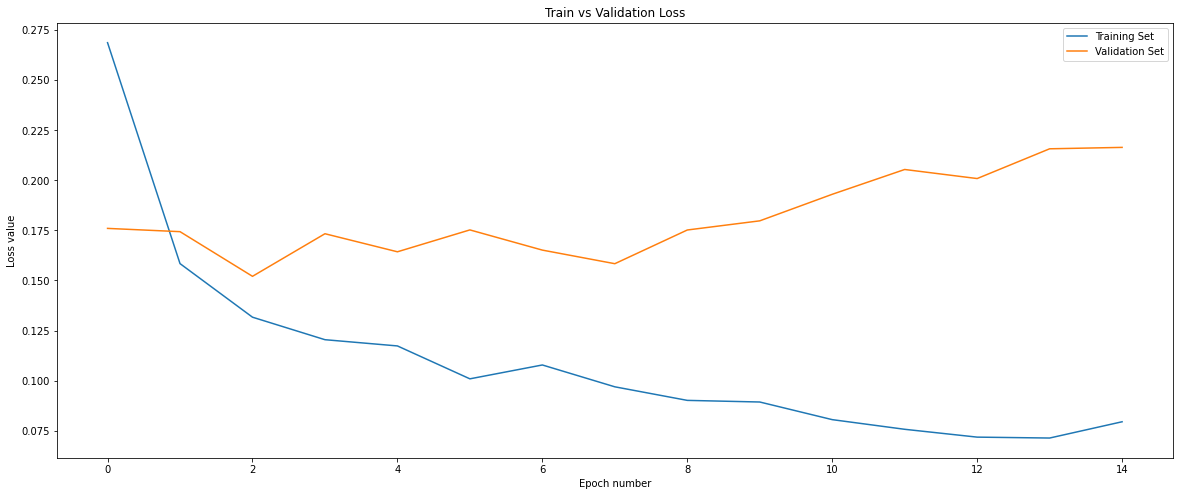

In [10]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(loss_train)
plt.plot(loss_val)
plt.xlabel('Epoch number')
plt.ylabel('Loss value')
plt.legend(['Training Set','Validation Set'])
plt.title('Train vs Validation Loss')
plt.show()

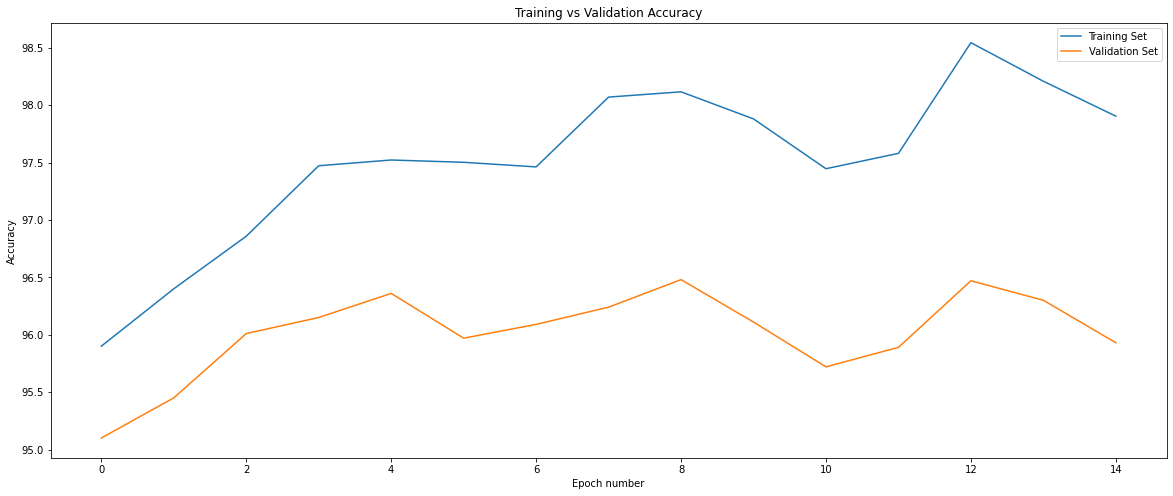

In [11]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_A = accuracy_val[-1]#final validation accuarcy of A

### Model B


In [12]:
print(device)

#training loop of model B
import time
start_time = time.time()
model = modelB
model.to(device)

optimizer = set_optimizer(model, lr)
num_iter = 0

# Losses per epoch
loss_train = []
loss_val = []
accuracy_train = []
accuracy_val = []

for epoch in range(num_epochs):
    loss_epoch = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Flatten image
        img = inputs.reshape(inputs.shape[0], -1)

        #Forward pass to get output
        outputs = model(img)

        # Calculate cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()
        loss_epoch += loss.item()

        
        # Updating parameters
        optimizer.step()
        num_iter += 1

    #append the current loss and accuracy of the epoch
    accuracy_train.append(accuracy(train_loader, model, train))
    loss_train.append(loss_epoch / len(train_loader))
   
    # Validation Loss after every epoch
    loss_epoch_val = 0

    #disable gradient calculation
    with torch.no_grad():
      for i, (image, output_labels) in enumerate(val_loader):
          image, output_labels = image.to(device), output_labels.to(device)
          img = image.reshape(image.shape[0], -1)
        
          #Forward pass to get output
          predictions = model(img)
          loss = criterion(predictions, output_labels)
          loss_epoch_val += loss.item()

          
      loss_val.append(loss_epoch_val / len(val_loader))
      accuracy_val.append(accuracy(val_loader, model, val))
    
    print(f"Epoch {epoch:3}. Training Loss: {loss_train[-1]:.4f},  Validation Loss: {loss_val[-1]:.4f}")
    print(f"Epoch {epoch:3}. Training acc: {accuracy_train[-1]:.4f},  Validation acc: {accuracy_val[-1]:.4f}")
    print("---------------------------------------------------------------------------------")
end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

cuda:0
Epoch   0. Training Loss: 0.3222,  Validation Loss: 0.3547
Epoch   0. Training acc: 90.9840,  Validation acc: 90.2400
---------------------------------------------------------------------------------
Epoch   1. Training Loss: 0.1955,  Validation Loss: 0.1933
Epoch   1. Training acc: 95.6940,  Validation acc: 95.1000
---------------------------------------------------------------------------------
Epoch   2. Training Loss: 0.1684,  Validation Loss: 0.1966
Epoch   2. Training acc: 95.6500,  Validation acc: 94.6800
---------------------------------------------------------------------------------
Epoch   3. Training Loss: 0.1430,  Validation Loss: 0.1822
Epoch   3. Training acc: 96.8720,  Validation acc: 95.5200
---------------------------------------------------------------------------------
Epoch   4. Training Loss: 0.1408,  Validation Loss: 0.1892
Epoch   4. Training acc: 96.3840,  Validation acc: 95.4000
---------------------------------------------------------------------------

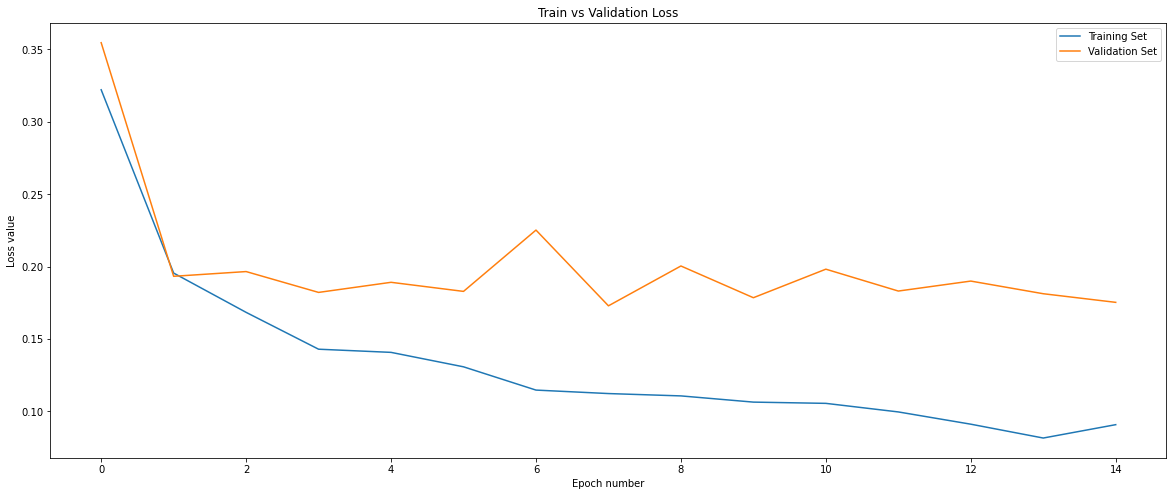

In [13]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(loss_train)
plt.plot(loss_val)
plt.xlabel('Epoch number')
plt.ylabel('Loss value')
plt.legend(['Training Set','Validation Set'])
plt.title('Train vs Validation Loss')
plt.show()

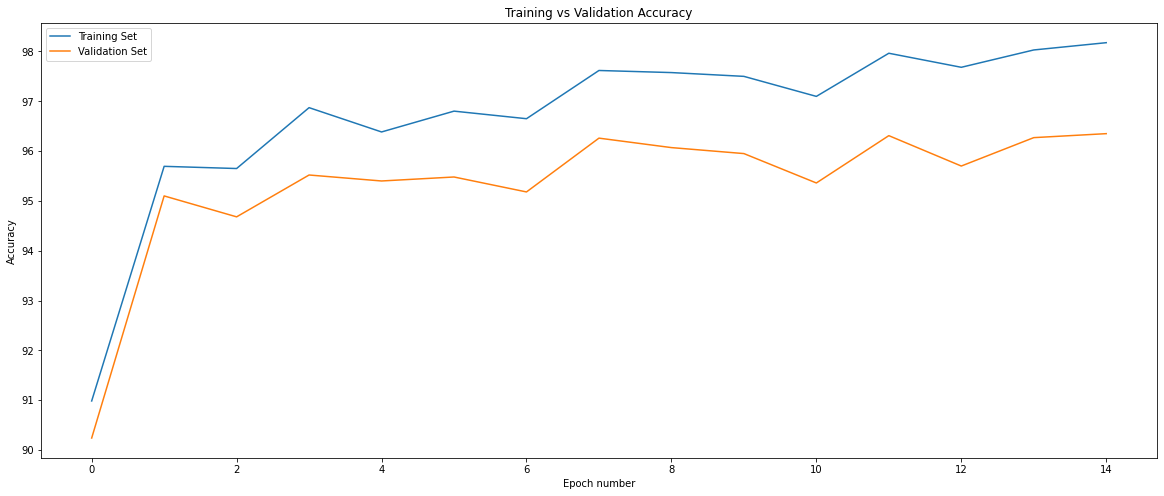

In [14]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_B = accuracy_val[-1]#final validation accuarcy of B

### Model C


In [15]:
print(device)

#training loop of model C
import time
start_time = time.time()
model = modelC
model.to(device)

optimizer = set_optimizer(model, lr)
num_iter = 0

# Losses per epoch
loss_train = []
loss_val = []
accuracy_train = []
accuracy_val = []

for epoch in range(num_epochs):
    loss_epoch = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Flatten image
        img = inputs.reshape(inputs.shape[0], -1)

        #Forward pass to get output
        outputs = model(img)

        # Calculate cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()
        loss_epoch += loss.item()

        
        # Updating parameters
        optimizer.step()
        num_iter += 1

    #append the current loss and accuracy of the epoch
    accuracy_train.append(accuracy(train_loader, model, train))
    loss_train.append(loss_epoch / len(train_loader))
   
    # Validation Loss after every epoch
    loss_epoch_val = 0

    #disable gradient calculation
    with torch.no_grad():
      for i, (image, output_labels) in enumerate(val_loader):
          image, output_labels = image.to(device), output_labels.to(device)
          img = image.reshape(image.shape[0], -1)
        
          #Forward pass to get output
          predictions = model(img)
          loss = criterion(predictions, output_labels)
          loss_epoch_val += loss.item()

          
      loss_val.append(loss_epoch_val / len(val_loader))
      accuracy_val.append(accuracy(val_loader, model, val))
    
    print(f"Epoch {epoch:3}. Training Loss: {loss_train[-1]:.4f},  Validation Loss: {loss_val[-1]:.4f}")
    print(f"Epoch {epoch:3}. Training acc: {accuracy_train[-1]:.4f},  Validation acc: {accuracy_val[-1]:.4f}")
    print("---------------------------------------------------------------------------------")
end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

cuda:0
Epoch   0. Training Loss: 0.3799,  Validation Loss: 0.2709
Epoch   0. Training acc: 94.1000,  Validation acc: 93.3200
---------------------------------------------------------------------------------
Epoch   1. Training Loss: 0.2426,  Validation Loss: 0.3225
Epoch   1. Training acc: 94.3480,  Validation acc: 93.3100
---------------------------------------------------------------------------------
Epoch   2. Training Loss: 0.2084,  Validation Loss: 0.2105
Epoch   2. Training acc: 96.0320,  Validation acc: 94.5700
---------------------------------------------------------------------------------
Epoch   3. Training Loss: 0.1827,  Validation Loss: 0.2125
Epoch   3. Training acc: 95.6340,  Validation acc: 94.3700
---------------------------------------------------------------------------------
Epoch   4. Training Loss: 0.1674,  Validation Loss: 0.2008
Epoch   4. Training acc: 96.3080,  Validation acc: 94.8700
---------------------------------------------------------------------------

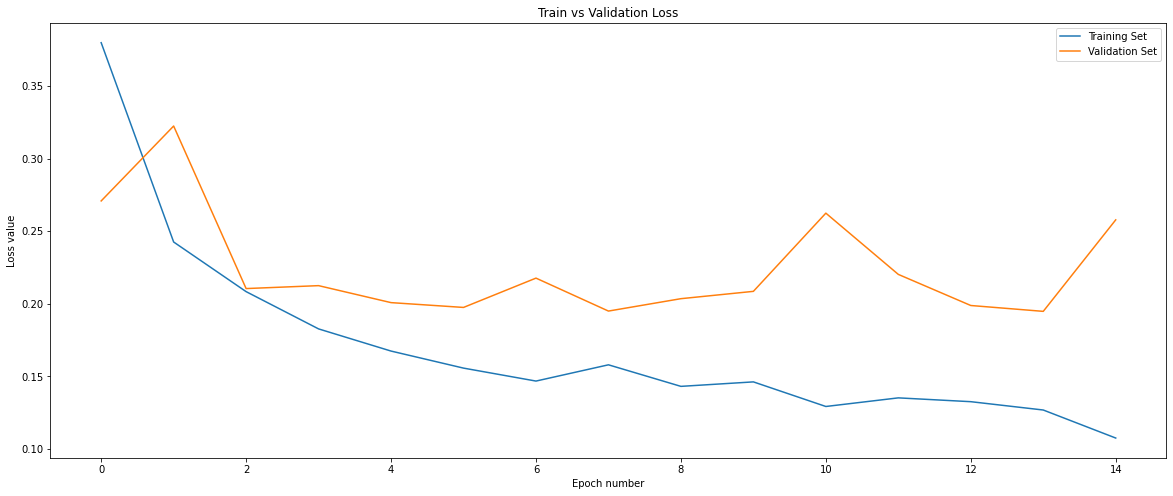

In [16]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C

plt.rcParams["figure.figsize"] = (20,8)

plt.plot(loss_train)
plt.plot(loss_val)
plt.xlabel('Epoch number')
plt.ylabel('Loss value')
plt.legend(['Training Set','Validation Set'])
plt.title('Train vs Validation Loss')
plt.show()

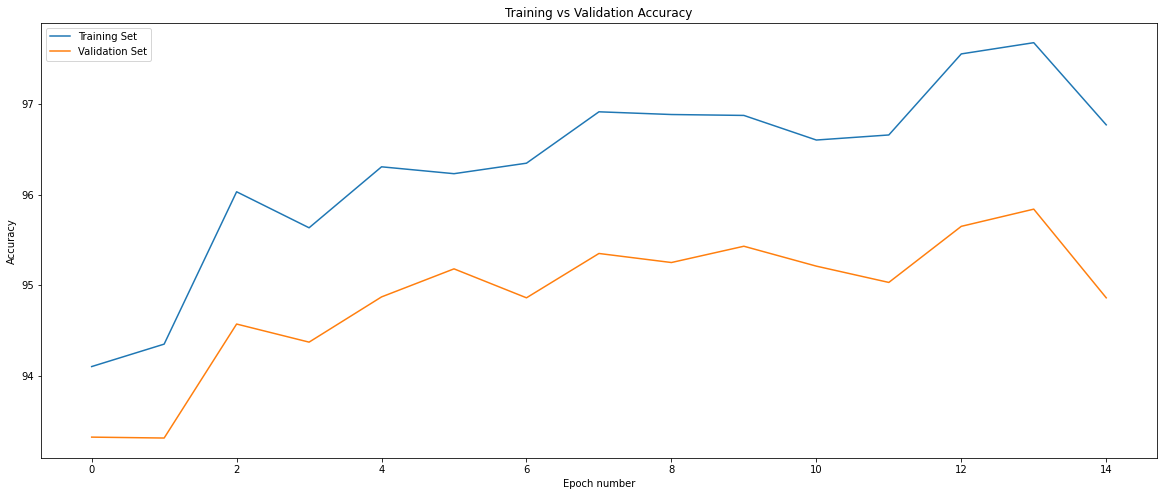

In [17]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(accuracy_train)
plt.plot(accuracy_val)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'])
plt.title('Training vs Validation Accuracy')
plt.show()
acc_C = accuracy_val[-1]#final validation accuarcy of C

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [18]:
acc = [acc_A, acc_B, acc_C]
mod = [modelA, modelB, modelC]
max_value = max(acc)
model_relu = mod[acc.index(max_value)]
input_size = 784 # 28x28
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 256
hidden_size_4 = 512
output_size = 10

# Leaky ReLU model definiton

# Tanh model definition


# Maintain these variable names
if model_relu== modelA:
  model_lrelu = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_2, output_size)
    )
  model_tanh = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.Tanh(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.Tanh(),
    nn.Linear(hidden_size_2, output_size)
  )
elif model_relu==modelB:
  model_lrelu = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_3, output_size)
  )
  model_tanh = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.Tanh(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.Tanh(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.Tanh(),
    nn.Linear(hidden_size_3, output_size)
  )
else:
  model_lrelu = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_3, hidden_size_4),
    nn.LeakyReLU(),
    nn.Linear(hidden_size_4, output_size)
  )
  model_tanh = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),
    nn.Tanh(),
    nn.Linear(hidden_size_1, hidden_size_2),
    nn.Tanh(),
    nn.Linear(hidden_size_2, hidden_size_3),
    nn.Tanh(),
    nn.Linear(hidden_size_3, hidden_size_4),
    nn.Tanh(),
    nn.Linear(hidden_size_4, output_size)
)
print(model_lrelu)
print(model_tanh)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=256, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=256, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=256, bias=True)
  (5): Tanh()
  (6): Linear(in_features=256, out_features=10, bias=True)
)


### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [19]:
print(device)

#training loop of model leaky relu
import time
start_time = time.time()
model = model_lrelu
model.to(device)

optimizer = set_optimizer(model, lr)
num_iter = 0

# Losses per epoch
loss_train = []
loss_val = []
accuracy_train = []
accuracy_val = []

for epoch in range(num_epochs):
    loss_epoch = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Flatten image
        img = inputs.reshape(inputs.shape[0], -1)

        #Forward pass to get output
        outputs = model(img)

        # Calculate cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()
        loss_epoch += loss.item()

        
        # Updating parameters
        optimizer.step()
        num_iter += 1

    #append the current loss and accuracy of the epoch
    accuracy_train.append(accuracy(train_loader, model, train))
    loss_train.append(loss_epoch / len(train_loader))
   
    # Validation Loss after every epoch
    loss_epoch_val = 0

    #disable gradient calculation
    with torch.no_grad():
      for i, (image, output_labels) in enumerate(val_loader):
          image, output_labels = image.to(device), output_labels.to(device)
          img = image.reshape(image.shape[0], -1)
        
          #Forward pass to get output
          predictions = model(img)
          loss = criterion(predictions, output_labels)
          loss_epoch_val += loss.item()

          
      loss_val.append(loss_epoch_val / len(val_loader))
      accuracy_val.append(accuracy(val_loader, model, val))
    
    print(f"Epoch {epoch:3}. Training Loss: {loss_train[-1]:.4f},  Validation Loss: {loss_val[-1]:.4f}")
    print(f"Epoch {epoch:3}. Training acc: {accuracy_train[-1]:.4f},  Validation acc: {accuracy_val[-1]:.4f}")
    print("---------------------------------------------------------------------------------")
end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

cuda:0
Epoch   0. Training Loss: 0.3124,  Validation Loss: 0.2631
Epoch   0. Training acc: 93.8020,  Validation acc: 92.5100
---------------------------------------------------------------------------------
Epoch   1. Training Loss: 0.2008,  Validation Loss: 0.1943
Epoch   1. Training acc: 95.8420,  Validation acc: 94.8500
---------------------------------------------------------------------------------
Epoch   2. Training Loss: 0.1759,  Validation Loss: 0.2328
Epoch   2. Training acc: 95.7700,  Validation acc: 94.7100
---------------------------------------------------------------------------------
Epoch   3. Training Loss: 0.1599,  Validation Loss: 0.2138
Epoch   3. Training acc: 96.2860,  Validation acc: 95.1600
---------------------------------------------------------------------------------
Epoch   4. Training Loss: 0.1410,  Validation Loss: 0.1736
Epoch   4. Training acc: 96.6680,  Validation acc: 95.4000
---------------------------------------------------------------------------

In [20]:
print(device)

#training loop of model tanh
import time
start_time = time.time()
model = model_tanh
model.to(device)

optimizer = set_optimizer(model, lr)
num_iter = 0

# Losses per epoch
loss_train = []
loss_val = []
accuracy_train = []
accuracy_val = []

for epoch in range(num_epochs):
    loss_epoch = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Flatten image
        img = inputs.reshape(inputs.shape[0], -1)

        #Forward pass to get output
        outputs = model(img)

        # Calculate cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()
        loss_epoch += loss.item()

        
        # Updating parameters
        optimizer.step()
        num_iter += 1

    #append the current loss and accuracy of the epoch
    accuracy_train.append(accuracy(train_loader, model, train))
    loss_train.append(loss_epoch / len(train_loader))
   
    # Validation Loss after every epoch
    loss_epoch_val = 0

    #disable gradient calculation
    with torch.no_grad():
      for i, (image, output_labels) in enumerate(val_loader):
          image, output_labels = image.to(device), output_labels.to(device)
          img = image.reshape(image.shape[0], -1)
        
          #Forward pass to get output
          predictions = model(img)
          loss = criterion(predictions, output_labels)
          loss_epoch_val += loss.item()

          
      loss_val.append(loss_epoch_val / len(val_loader))
      accuracy_val.append(accuracy(val_loader, model, val))
    
    print(f"Epoch {epoch:3}. Training Loss: {loss_train[-1]:.4f},  Validation Loss: {loss_val[-1]:.4f}")
    print(f"Epoch {epoch:3}. Training acc: {accuracy_train[-1]:.4f},  Validation acc: {accuracy_val[-1]:.4f}")
    print("---------------------------------------------------------------------------------")
end_time = time.time()
print(f"Training took {end_time-start_time} seconds for {num_epochs} epochs")

cuda:0
Epoch   0. Training Loss: 0.3809,  Validation Loss: 0.3106
Epoch   0. Training acc: 91.7980,  Validation acc: 91.0100
---------------------------------------------------------------------------------
Epoch   1. Training Loss: 0.2716,  Validation Loss: 0.3376
Epoch   1. Training acc: 92.0940,  Validation acc: 91.1200
---------------------------------------------------------------------------------
Epoch   2. Training Loss: 0.2967,  Validation Loss: 0.2738
Epoch   2. Training acc: 93.0980,  Validation acc: 92.2600
---------------------------------------------------------------------------------
Epoch   3. Training Loss: 0.2859,  Validation Loss: 0.2761
Epoch   3. Training acc: 93.7380,  Validation acc: 92.8200
---------------------------------------------------------------------------------
Epoch   4. Training Loss: 0.2790,  Validation Loss: 0.3321
Epoch   4. Training acc: 92.4100,  Validation acc: 91.3000
---------------------------------------------------------------------------

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [21]:
# Define how to calculate Accuracy on Test Set
def test_loss(model):
  model.to(device)   
  accuracy_test = accuracy(test_loader, model, test_data)
  print(f" Test Accuracy: {accuracy_test:.4f}")

In [22]:
# Accuracy of RELU model
test_loss(model=model_relu)

 Test Accuracy: 96.7300


In [23]:
# Accuracy of TanH model
test_loss(model = model_tanh)

 Test Accuracy: 91.7900


In [24]:
# Accuracy of LeakyReLU model
test_loss(model = model_lrelu)

 Test Accuracy: 94.6200


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `96.7300` %
* TanH model Test Set Accuracy: `91.7900` %
* LeakReLU model Test Set Accuracy: `94.6200` %